We now have metrics that use the stellar luminosity function maps to compute the errors that will result from stellar crowding.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.maps as maps

In [2]:
# Set up the database connection
opsdb = db.OpsimDatabase('baseline_v1.4_10yrs.db')
outDir = 'crowding_test'
resultsDb = db.ResultsDb(outDir=outDir)
nside = 32

For the CrowdingMetric, one sets the acceptable magnitude uncertainty, and the metric finds the magnitude star that will have that uncertainty given the crowding.  

In [3]:
bundleList = []
metric = metrics.CrowdingM5Metric(crowding_error=0.05, maps=['TrilegalDensityMap'])

In [4]:
slicer = slicers.HealpixSlicer(nside=nside, useCache=False)
sql = 'filter="r" and night < 730'
plotDict={'colorMin':21., 'colorMax':25.}
bundle = metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict)
bundleList.append(bundle)

bundleDict = metricBundles.makeBundlesDictFromList(bundleList)

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


Querying database SummaryAllProps with constraint filter="r" and night < 730 for columns ['seeingFwhmGeom', 'fieldRA', 'fieldDec']
Found 85634 visits
Running:  ['opsim_Crowding_to_Precision_0_05_r_and_night_lt_730_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="r" and night < 730" constraint now.
monopole: 24.5938  dipole: lon: 58.6329, lat: 27.1891, amp: 2.99754
Plotting complete.


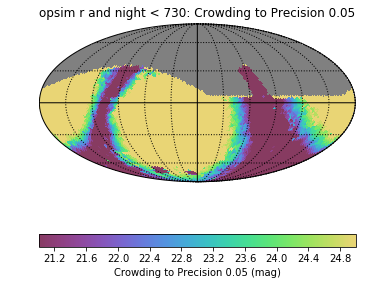

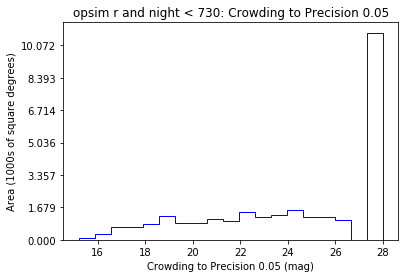

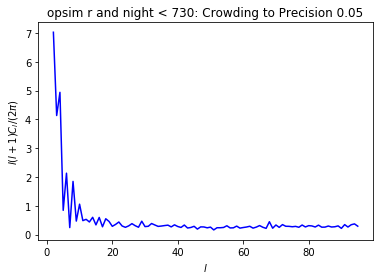

In [5]:
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

The second metric takes a single stellar magnitude and returns the resulting magnitude uncertainty on it, taking the standard 5-sigma depth or the crowding uncertainty, whichever is larger.

In [6]:
bundleList = []
metric = metrics.CrowdingMagUncertMetric(maps=['TrilegalDensityMap'])
slicer = slicers.HealpixSlicer(nside=nside, useCache=False)
sql = 'filter="r" and night < 730'
bundle = metricBundles.MetricBundle(metric,slicer,sql)
bundleList.append(bundle)
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


Querying database SummaryAllProps with constraint filter="r" and night < 730 for columns ['seeingFwhmGeom', 'fieldRA', 'fieldDec']
Found 85634 visits
Running:  ['opsim_CrowdingError_at_20_00_r_and_night_lt_730_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="r" and night < 730" constraint now.
monopole: 0.0476191  dipole: lon: -106.411, lat: -11.71, amp: 0.0328783
Plotting complete.


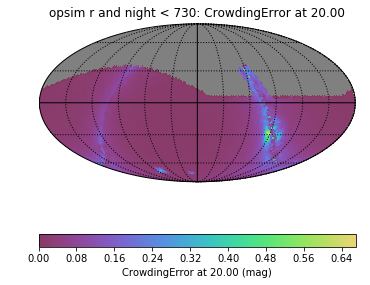

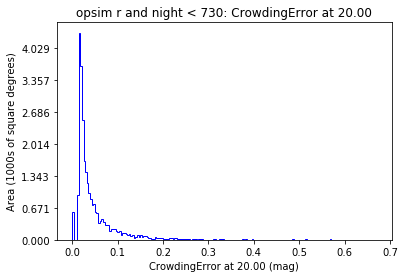

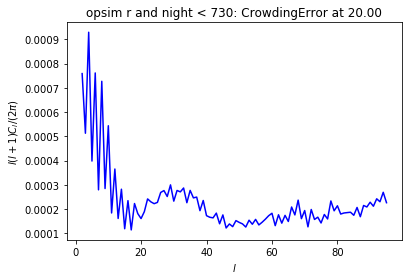

In [7]:
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)